## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0  1.347402  1.275181 -0.624346 -1.393935 -0.289010 -1.662106
1 -1.801280  0.717322 -1.576837 -0.443799  0.540863 -0.722747
2  0.106741  0.337820 -1.461133 -0.703205 -0.570672  0.552364
3  1.184256  1.053164 -0.536501  0.542535  0.610759  0.370400
4 -1.480223 -0.025310  1.054888  0.101872  1.681050 -0.183664


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 1.0164598	total: 67.7ms	remaining: 1m 7s
1:	learn: 1.0071765	total: 68.5ms	remaining: 34.2s
2:	learn: 0.9989720	total: 69.1ms	remaining: 23s
3:	learn: 0.9883350	total: 69.7ms	remaining: 17.4s
4:	learn: 0.9780160	total: 70.2ms	remaining: 14s
5:	learn: 0.9698131	total: 70.9ms	remaining: 11.7s
6:	learn: 0.9588844	total: 71.4ms	remaining: 10.1s
7:	learn: 0.9488229	total: 71.8ms	remaining: 8.91s
8:	learn: 0.9394714	total: 72.4ms	remaining: 7.97s
9:	learn: 0.9319357	total: 72.9ms	remaining: 7.21s
10:	learn: 0.9236464	total: 73.4ms	remaining: 6.6s
11:	learn: 0.9130458	total: 73.9ms	remaining: 6.09s
12:	learn: 0.9047540	total: 74.5ms	remaining: 5.65s
13:	learn: 0.8962308	total: 75ms	remaining: 5.28s
14:	learn: 0.8891005	total: 75.5ms	remaining: 4.96s
15:	learn: 0.8824385	total: 76ms	remaining: 4.67s
16:	learn: 0.8755110	total: 76.3ms	remaining: 4.41s
17:	learn: 0.8688450	total: 77ms	remaining: 4.2s
18:	learn: 0.8623885	total: 77.6ms	remaining: 4s
19:	lea

89:	learn: 0.4808329	total: 109ms	remaining: 1.1s
90:	learn: 0.4773521	total: 109ms	remaining: 1.09s
91:	learn: 0.4745389	total: 110ms	remaining: 1.08s
92:	learn: 0.4711032	total: 110ms	remaining: 1.07s
93:	learn: 0.4666116	total: 111ms	remaining: 1.07s
94:	learn: 0.4633127	total: 111ms	remaining: 1.06s
95:	learn: 0.4597580	total: 112ms	remaining: 1.05s
96:	learn: 0.4569330	total: 112ms	remaining: 1.04s
97:	learn: 0.4538380	total: 112ms	remaining: 1.03s
98:	learn: 0.4512874	total: 113ms	remaining: 1.03s
99:	learn: 0.4477786	total: 114ms	remaining: 1.02s
100:	learn: 0.4439347	total: 114ms	remaining: 1.01s
101:	learn: 0.4408281	total: 114ms	remaining: 1s
102:	learn: 0.4370631	total: 115ms	remaining: 998ms
103:	learn: 0.4341867	total: 115ms	remaining: 991ms
104:	learn: 0.4314029	total: 115ms	remaining: 984ms
105:	learn: 0.4278696	total: 116ms	remaining: 978ms
106:	learn: 0.4242164	total: 116ms	remaining: 972ms
107:	learn: 0.4207608	total: 117ms	remaining: 966ms
108:	learn: 0.4178502	total

251:	learn: 0.1630770	total: 187ms	remaining: 555ms
252:	learn: 0.1620950	total: 188ms	remaining: 554ms
253:	learn: 0.1612470	total: 188ms	remaining: 552ms
254:	learn: 0.1604127	total: 188ms	remaining: 551ms
255:	learn: 0.1597741	total: 189ms	remaining: 549ms
256:	learn: 0.1590434	total: 189ms	remaining: 547ms
257:	learn: 0.1579179	total: 190ms	remaining: 546ms
258:	learn: 0.1571028	total: 190ms	remaining: 544ms
259:	learn: 0.1563858	total: 191ms	remaining: 542ms
260:	learn: 0.1553652	total: 191ms	remaining: 541ms
261:	learn: 0.1542239	total: 191ms	remaining: 539ms
262:	learn: 0.1534986	total: 192ms	remaining: 538ms
263:	learn: 0.1526335	total: 192ms	remaining: 536ms
264:	learn: 0.1517410	total: 193ms	remaining: 534ms
265:	learn: 0.1509913	total: 193ms	remaining: 533ms
266:	learn: 0.1503763	total: 193ms	remaining: 531ms
267:	learn: 0.1496112	total: 194ms	remaining: 530ms
268:	learn: 0.1487134	total: 194ms	remaining: 528ms
269:	learn: 0.1475341	total: 195ms	remaining: 527ms
270:	learn: 

479:	learn: 0.0553643	total: 292ms	remaining: 316ms
480:	learn: 0.0551230	total: 292ms	remaining: 316ms
481:	learn: 0.0548215	total: 293ms	remaining: 315ms
482:	learn: 0.0545262	total: 293ms	remaining: 314ms
483:	learn: 0.0542622	total: 294ms	remaining: 313ms
484:	learn: 0.0539672	total: 294ms	remaining: 312ms
485:	learn: 0.0537288	total: 295ms	remaining: 312ms
486:	learn: 0.0534439	total: 295ms	remaining: 311ms
487:	learn: 0.0531574	total: 295ms	remaining: 310ms
488:	learn: 0.0529059	total: 296ms	remaining: 309ms
489:	learn: 0.0526619	total: 296ms	remaining: 308ms
490:	learn: 0.0523648	total: 297ms	remaining: 308ms
491:	learn: 0.0520915	total: 297ms	remaining: 307ms
492:	learn: 0.0517864	total: 298ms	remaining: 306ms
493:	learn: 0.0515253	total: 298ms	remaining: 305ms
494:	learn: 0.0513055	total: 299ms	remaining: 305ms
495:	learn: 0.0510512	total: 299ms	remaining: 304ms
496:	learn: 0.0507888	total: 300ms	remaining: 303ms
497:	learn: 0.0505762	total: 300ms	remaining: 303ms
498:	learn: 

643:	learn: 0.0283333	total: 370ms	remaining: 205ms
644:	learn: 0.0282037	total: 371ms	remaining: 204ms
645:	learn: 0.0280511	total: 371ms	remaining: 204ms
646:	learn: 0.0279718	total: 372ms	remaining: 203ms
647:	learn: 0.0278714	total: 372ms	remaining: 202ms
648:	learn: 0.0277228	total: 373ms	remaining: 202ms
649:	learn: 0.0276452	total: 373ms	remaining: 201ms
650:	learn: 0.0275149	total: 373ms	remaining: 200ms
651:	learn: 0.0274559	total: 374ms	remaining: 200ms
652:	learn: 0.0273582	total: 374ms	remaining: 199ms
653:	learn: 0.0272365	total: 375ms	remaining: 198ms
654:	learn: 0.0270937	total: 375ms	remaining: 198ms
655:	learn: 0.0269539	total: 376ms	remaining: 197ms
656:	learn: 0.0268971	total: 376ms	remaining: 196ms
657:	learn: 0.0267993	total: 377ms	remaining: 196ms
658:	learn: 0.0266631	total: 377ms	remaining: 195ms
659:	learn: 0.0265319	total: 377ms	remaining: 194ms
660:	learn: 0.0264766	total: 378ms	remaining: 194ms
661:	learn: 0.0263814	total: 378ms	remaining: 193ms
662:	learn: 

863:	learn: 0.0157440	total: 476ms	remaining: 74.9ms
864:	learn: 0.0157205	total: 476ms	remaining: 74.3ms
865:	learn: 0.0157011	total: 477ms	remaining: 73.8ms
866:	learn: 0.0156572	total: 477ms	remaining: 73.2ms
867:	learn: 0.0156339	total: 477ms	remaining: 72.6ms
868:	learn: 0.0156109	total: 478ms	remaining: 72ms
869:	learn: 0.0155919	total: 478ms	remaining: 71.5ms
870:	learn: 0.0155691	total: 479ms	remaining: 70.9ms
871:	learn: 0.0155504	total: 479ms	remaining: 70.3ms
872:	learn: 0.0155279	total: 479ms	remaining: 69.8ms
873:	learn: 0.0155112	total: 480ms	remaining: 69.2ms
874:	learn: 0.0154497	total: 480ms	remaining: 68.6ms
875:	learn: 0.0154333	total: 481ms	remaining: 68.1ms
876:	learn: 0.0153892	total: 481ms	remaining: 67.5ms
877:	learn: 0.0153659	total: 482ms	remaining: 66.9ms
878:	learn: 0.0153437	total: 482ms	remaining: 66.4ms
879:	learn: 0.0153023	total: 483ms	remaining: 65.8ms
880:	learn: 0.0152796	total: 483ms	remaining: 65.3ms
881:	learn: 0.0152571	total: 483ms	remaining: 64

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

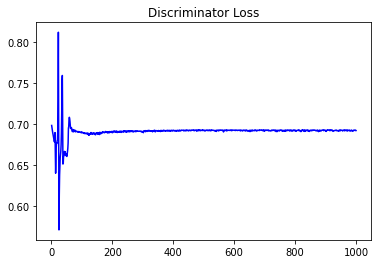

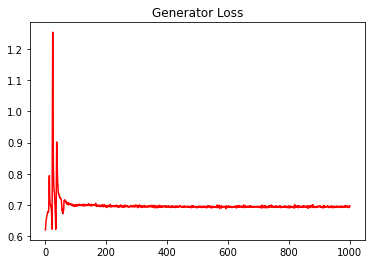

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.033438900753338524


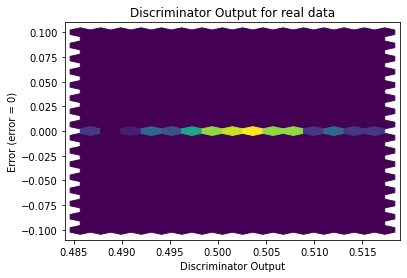

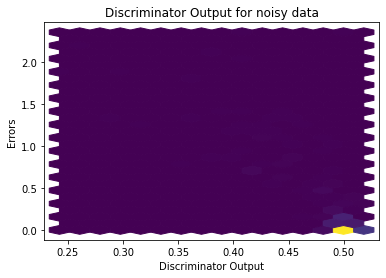

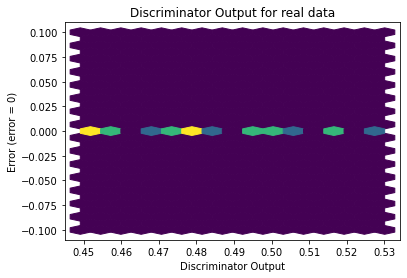

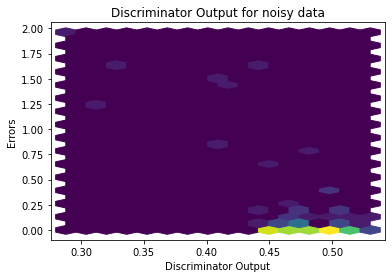

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


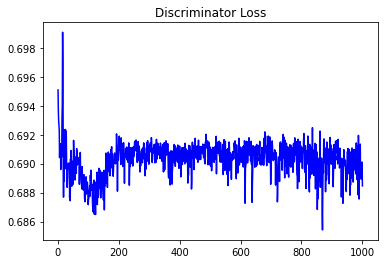

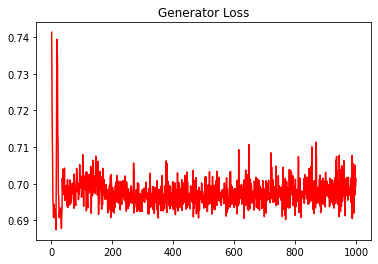

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.04114299277791211


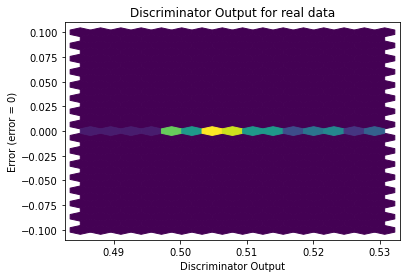

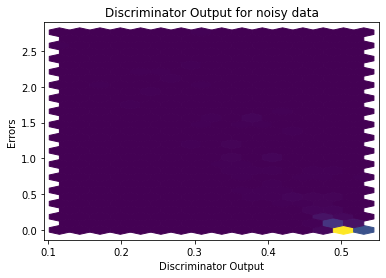

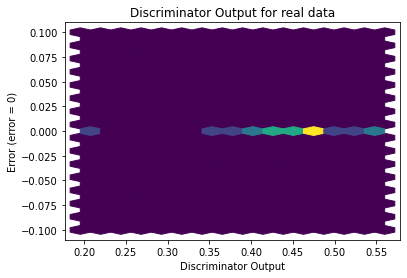

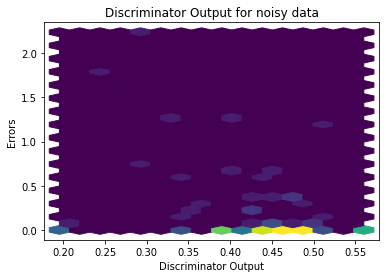

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.6326]], requires_grad=True)
